In [2]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('vgames2.csv')
df = df.set_index('Unnamed: 0')

## 데이터 파악하기

In [4]:
df.info()
#결측치가 없는 column: Name, Platform
#결측치가 있는 column: Year, Genre, Publisher
#categorical: platform, year, genre, publisher
#numerical: sales

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


## 데이터 preprocessing

In [5]:
#매출액 column들에서 K 제거하고 0.001 곱하기 & M 제거한 후 float로 typecast
df.JP_Sales = df.JP_Sales.apply(lambda x: 0.001*float(x[:-1]) if 'K' in x else x).astype('string')
df.JP_Sales = df.JP_Sales.str.replace('M', '')
df['JP_Sales'] = df['JP_Sales'].astype('float')

In [6]:
df.NA_Sales = df.NA_Sales.apply(lambda x: 0.001*float(x[:-1]) if 'K' in x else x).astype('string')
df.NA_Sales = df.NA_Sales.str.replace('M', '')
df['NA_Sales'] = df['NA_Sales'].astype('float')

In [7]:
df.EU_Sales = df.EU_Sales.apply(lambda x: 0.001*float(x[:-1]) if 'K' in x else x).astype('string')
df.EU_Sales = df.EU_Sales.str.replace('M', '')
df['EU_Sales'] = df['EU_Sales'].astype('float')

In [8]:
df.Other_Sales = df.Other_Sales.apply(lambda x: 0.001*float(x[:-1]) if 'K' in x else x).astype('string')
df.Other_Sales = df.Other_Sales.str.replace('M', '')
df['Other_Sales'] = df['Other_Sales'].astype('float')

In [9]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [10]:
df['Year'] = df['Year'].fillna(3000).astype(int) #nan는 일단 int로 바꿔야 하니 큰 수로 넣었습니다.

In [11]:
df.Year = df.Year.apply(lambda x: x+2000 if x <= 16 else x)

In [12]:
df.Year = df.Year.apply(lambda x: x+1900 if 86<=x<=98 else x)

In [13]:
df['Year'].sort_values()  #현재 nan 값들은 3000으로 채워진 상태 ;271개->나중에 Year feature를 쓸 때만 삭제할 예정

Unnamed: 0
13134    1980
14265    1980
5724     1980
7318     1980
10122    1980
         ... 
4522     3000
4512     3000
13629    3000
12788    3000
12617    3000
Name: Year, Length: 16598, dtype: int64

In [14]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [15]:
#결측치의 비율
#Year:0.016   16327    ->drop
#Genre: 0.003          ->drop
#Publisher 16540 0.004 ->drop
#Platform 

#sales 결측치는 없지만 0의 비율이 높음
#NA_Sales; 4499/16598   0.27
#EU_Sales:  5730/16598  0.345
#JP_Sales: 6143/16598   0.37
#Other_Sales: 6477/16598 0.39


In [16]:
#전체 Sales column 만들기
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Unnamed: 0,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


In [17]:
#Year 결측치 드랍한 subset
subset = df.loc[~df['Year'].isin([3000])]

데이터 전처리: 매출액에 있던 수치들을 숫자로 통일했고 플랫폼, 퍼블리셔, 연도, 장르의 결측치들은 비중이 5% 이하였기 때문에 무시하였습니다.

# 데이터 분석 목표: 다음 분기 매출이 잘 나올 게임 장르, 플랫폼, 타겟 지역 선택하기
## 1. Top 100 게임 분석
## 2. 연도별 선호하는 장르의 차이가 있는가?
## 3. 지역별 장르 선호가 유의미한가? 그렇다면 어떤 지역을 타겟으로 개발해야 할까?
## 4. 장르별 매출액의 차이는 유의미한가? 유의미하다면 어떤 장르의 게임을 개발해야 할까?
## 5. 플랫폼별 매출액 차이가 있는가?


# 1. 매출이 높은 게임에 대한 분석

TOP 3 게임들의 간략한 분석과 top 100 게임들의 Platform, Genre, Publisher를 그래프로 확인해본다.

In [20]:
top100 = df.sort_values(by='Total_Sales', ascending = False).head(100)
top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Unnamed: 0,,,,,,,,,,
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
1099,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
7495,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
12851,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44


In [37]:
top100year = top100.sort_values(by='Year')

In [301]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

fig = plt.figure()
px.scatter(data_frame= top100,x = 'Genre', y = 'Total_Sales', color='Platform',size= 'Total_Sales')


<Figure size 432x288 with 0 Axes>

이 그래프는 top100 게임들 중 x축은 게임 장르를, y축은 총 매출액을 의미합니다.높은 매출액을 기록한 장르로는 스포츠, 플랫폼, 레이싱이 있습니다. 좌측 위의 붉은 마커는 닌텐도 Wii를 의미하는데, 여러 장르에서 상위 매출을 기록하고 있습니다. 두 번째로 큰 플랫폼인 NES 역시 닌텐도에서 출시했던 가정용 게임기로 높은 매출을 기록한 것을 볼 수 있습니다.

In [22]:
plat100 = top100.groupby('Platform')
plat100 = pd.DataFrame(plat100.sum()[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Total_Sales']])
plat100.sort_values(by='Total_Sales', ascending=False)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
Wii,156.38,109.99,34.18,30.37,330.92
DS,72.66,65.14,52.08,17.30,207.18
X360,120.95,51.19,1.43,16.38,189.95
GB,66.35,27.12,31.63,3.59,128.69
PS3,41.38,46.52,4.73,18.87,111.50
NES,70.94,8.83,11.63,1.89,93.29
PS2,37.60,17.57,6.88,22.67,84.72
3DS,27.94,21.06,21.47,4.58,75.05
PS4,16.41,24.27,1.13,8.19,50.00


#### 1) Top 100 게임들의 platform 순위


In [23]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "ggplot2"
#px.defaults.template = ""
#pio.templates.default = "ggplot2"

fig = go.Figure(data=[
    go.Bar(name='NA_Sales', x=plat100.index, y= plat100['NA_Sales']),
    go.Bar(name='EU_Sales', x=plat100.index, y=plat100['EU_Sales']),
    go.Bar(name='JP_Sales', x=plat100.index, y=plat100['JP_Sales']),
    go.Bar(name='Other_Sales', x=plat100.index, y=plat100['Other_Sales'])
])

# Change the bar mode
fig.update_layout(title="Platforms of Top 100 games",
    xaxis_title="Platforms",
    yaxis_title="Sales",
    font=dict(size=18),barmode='stack')
#fig.add_annotation( 
   # text="Nintendo Wii", height = 80, x="Wii", y=330, arrowsize = 5, arrowhead=6, showarrow=True
#)
fig.update_yaxes( # the y-axis is in dollars
   ticksuffix="M($)", showgrid=True)

fig.show()

닌텐도 Wii, 닌텐도 DS, X360이 각각 1,2,3위를 차지했고 Wii 같은 경우는 전지역에서 많이 팔렸지만, 현시점에서 단종된 기종이기 때문에 유용한 정보는 아니라고 생각합니다.

## 2) Top 100 게임들의 퍼블리셔 순위 

In [25]:
pub100 = top100.groupby('Publisher').sum().drop(columns=['Year'])
pub100

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,
Activision,87.05,55.52,3.43,19.93,165.93
Atari,7.28,0.45,0.00,0.08,7.81
Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
Electronic Arts,10.54,22.95,0.47,5.90,39.86
Microsoft Game Studios,49.00,16.47,0.56,5.24,71.27
Nintendo,439.23,246.29,177.04,57.76,920.32
Sega,2.58,3.90,0.66,0.91,8.05
Sony Computer Entertainment,30.42,23.98,15.33,13.43,83.16
SquareSoft,2.28,1.72,3.63,0.23,7.86


In [26]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "ggplot2"
#px.defaults.template = ""
#pio.templates.default = "ggplot2"

fig = go.Figure(data=[
    go.Bar(name='NA_Sales', x=pub100.index, y= pub100['NA_Sales']),
    go.Bar(name='EU_Sales', x=pub100.index, y=pub100['EU_Sales']),
    go.Bar(name='JP_Sales', x=pub100.index, y=pub100['JP_Sales']),
    go.Bar(name='Other_Sales', x=pub100.index, y=pub100['Other_Sales'])
])

# Change the bar mode
fig.update_layout(title="Publishers of Top 100 games",
    xaxis_title="Publishers",
    yaxis_title="Sales",
    font=dict(size=18),barmode='stack')
#fig.add_annotation( 
   # text="Nintendo Wii", height = 80, x="Wii", y=330, arrowsize = 5, arrowhead=6, showarrow=True
#)
fig.update_yaxes( # the y-axis is in dollars
   ticksuffix="M($)", showgrid=True)

fig.show()

닌텐도가 우세하며 Wii, 3ds, ds 등 다양한 플랫폼을 갖고 있기 때문이라 생각됩니다.

# 2. 연도별 플랫폼과 장르의 선호 분석

## 장르와 연도의 연관성(카이제곱 검정)

In [68]:
#subset2 = year, genre의 결측치 drop한 값
subset2 = subset.loc[~subset['Genre'].isin([np.nan])]

In [263]:
subset2align = subset2.sort_values(by="Year")
subset2align

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Unnamed: 0,,,,,,,,,,
13134,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
7318,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.23
14265,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
9227,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
5724,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
...,...,...,...,...,...,...,...,...,...,...
13772,Lego Star Wars: The Force Awakens,XOne,2016,Action,Warner Bros. Interactive Entertainment,0.12,0.10,0.00,0.02,0.24
5311,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [ ]:
yearbygenre = pd.crosstab(subset2align['Year'],subset2align['Genre'])
yearbygenre

In [306]:
from scipy.stats import chi2_contingency

chi2_contingency(yearbygenre)
#귀무가설: 연도와 장르는 독립적이다.
#대안가설: 연도와 장르는 독립적이지 않다.
#pvalue가 0이기 때문에 유의수준 5%하에서 독립적이라는 귀무가설을 기각한다.

(2762.7998731892862,
 0.0,
 418,
 array([[1.59341402e+00, 6.24193647e-01, 4.10395036e-01, 8.37992259e-01,
         4.29563187e-01, 2.78675432e-01, 5.99619094e-01, 7.20525895e-01,
         6.29108558e-01, 4.17275911e-01, 1.12993795e+00, 3.29299011e-01],
        [9.16213061e+00, 3.58911347e+00, 2.35977146e+00, 4.81845549e+00,
         2.46998833e+00, 1.60238373e+00, 3.44780979e+00, 4.14302390e+00,
         3.61737421e+00, 2.39933649e+00, 6.49714321e+00, 1.89346931e+00],
        [7.17036309e+00, 2.80887141e+00, 1.84677766e+00, 3.77096517e+00,
         1.93303434e+00, 1.25403944e+00, 2.69828592e+00, 3.24236653e+00,
         2.83098851e+00, 1.87774160e+00, 5.08472077e+00, 1.48184555e+00],
        [3.38600479e+00, 1.32641150e+00, 8.72089451e-01, 1.78073355e+00,
         9.12821773e-01, 5.92185292e-01, 1.27419058e+00, 1.53111753e+00,
         1.33685569e+00, 8.86711310e-01, 2.40111814e+00, 6.99760398e-01],
        [2.78847453e+00, 1.09233888e+00, 7.18191313e-01, 1.46648645e+00,
         7.517

In [ ]:
tidy1 = subset2drop.melt(id_vars=['Year','Genre'], value_vars = ['Total_Sales'])
tidy1 = tidy1.drop(columns=['variable'])
tidy1

In [ ]:
tidy1 = tidy1.groupby(["Year",'Genre']).sum()
tidy1

In [ ]:
tidy3 = tidy1.reset_index()
tidy3

In [128]:
pivot1 = pd.pivot_table(tidy3, index='Year', columns='Genre', values='value').fillna(0)
pivot1


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00


In [225]:

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "ggplot2"
#px.defaults.template = ""
#759d44

fig = go.Figure(data=[
    go.Bar(name='Action', x=pivot1.index, y= pivot1['Action'], marker=dict(color='#8f701f')),
    go.Bar(name='Sports', x=pivot1.index, y=pivot1['Sports'], marker=dict(color='#858f20')),
    go.Bar(name='Shooter', x=pivot1.index, y=pivot1['Shooter'], marker=dict(color='#c9ba73')),
    go.Bar(name='Platform', x=pivot1.index, y=pivot1['Platform'], marker=dict(color='#ceca87')),
    go.Bar(name='Misc', x=pivot1.index, y=pivot1['Misc'], marker=dict(color='#e8daa3')),
    go.Bar(name='Racing', x=pivot1.index, y=pivot1['Racing'], marker=dict(color='#ffebc0')),
    go.Bar(name='Role-Playing', x=pivot1.index, y=pivot1['Role-Playing'], marker=dict(color='#f8d2a0')),
    go.Bar(name='Adventure', x=pivot1.index, y=pivot1['Adventure'], marker=dict(color='#f2b885')),
    go.Bar(name='Fighting', x=pivot1.index, y=pivot1['Fighting'], marker=dict(color='#ec9d6f')),
    go.Bar(name='Puzzle', x=pivot1.index, y=pivot1['Puzzle'], marker=dict(color='#e6805e')),
    go.Bar(name='Simulation', x=pivot1.index, y=pivot1['Simulation'], marker=dict(color='#de6155')),
    go.Bar(name='Strategy', x=pivot1.index, y=pivot1['Strategy'], marker=dict(color='#de425b'))
])

# Change the bar mode
fig.update_layout(title="Total sales over time ",   autosize=False,
    width=1500,
    height=800,
    xaxis_title="Year",
    yaxis_title="Sales",
    font=dict(size=18),barmode='stack')
#fig.add_annotation( 
   # text="Nintendo Wii", height = 80, x="Wii", y=330, arrowsize = 5, arrowhead=6, showarrow=True
#)
fig.update_yaxes( # the y-axis is in dollars
   ticksuffix="M($)", showgrid=True)

fig.show()

시계열 그래프를 보면 비디오 게임 시장은 계속 성장하다고 2008년도에 정점을 찍고 하향세 입니다. 2005~2011년은 비디오 게임의 황금기였는데, 그 당시 액션, 스포츠, 슈터 장르가 잘 팔린 것을 알 수 있습니다.

#3. 지역별 장르 선호도 차이

In [30]:
#장르에 따른 매출액 분석
groupedGenre = df.groupby('Genre')                                                     
genre = pd.DataFrame(groupedGenre.sum()[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Total_Sales']])
#genre.sort_values(by='Total_Sales', ascending=False)
genre.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [31]:
NA_genre = genre.sort_values(by='NA_Sales', ascending=False)
EU_genre = genre.sort_values(by='EU_Sales', ascending=False)
JP_genre = genre.sort_values(by='JP_Sales', ascending=False)
Other_genre = genre.sort_values(by='Other_Sales', ascending=False)
#그래프 4개로 비교하기
#북미: Action, Sports, Shooter, Platform, Misc
#유럽: Action, Sports, Shooter, Racing, Misc
#일본: Role-Playing, Action, Sports, Platform, Misc
#그외: Action, Sports, Shooter, Racing, Misc
#전체: Action, Sports, Shooter, Role-Playing, Platform

In [32]:
NA_genre = NA_genre.reset_index()
NA_genre = NA_genre.iloc[:5,:2]
NA_genre

,Genre,NA_Sales
0,Action,874.81
1,Sports,680.52
2,Shooter,581.92
3,Platform,446.44
4,Misc,408.05


In [33]:
EU_genre = EU_genre.reset_index()
EU_genre = EU_genre.iloc[:5,[0,2] ]
JP_genre = JP_genre.reset_index()
JP_genre = JP_genre.iloc[:5,[0,3]]
Other_genre = Other_genre.reset_index()
Other_genre = Other_genre.iloc[:5, [0,4]]

In [238]:
from scipy.stats import chisquare
print(chisquare(chi_genre, axis=None))    

Power_divergenceResult(statistic=3381.686126967247, pvalue=0.0)
Power_divergenceResult(statistic=1.1244241187263566, pvalue=0.9999088286862591)


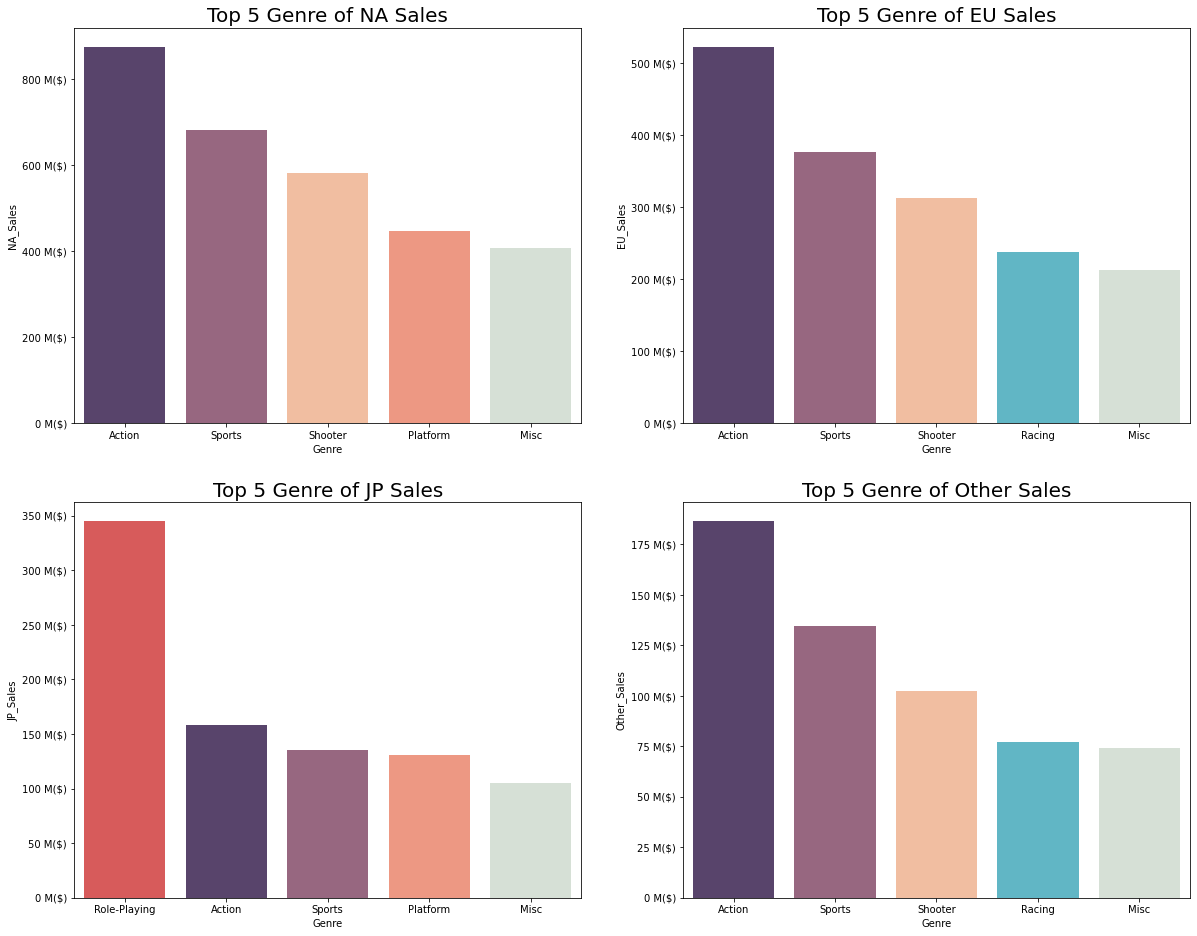

In [45]:
import matplotlib.ticker as ticker
import seaborn as sns
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Top 5 Genre of NA Sales", fontsize =20)
ax1 = sns.barplot(x='Genre', y = 'NA_Sales', palette = {"Action": '#583d72', "Sports": '#9f5f80', "Shooter": '#ffba93', "Platform": '#ff8e71', "Misc":'#d4e2d4'},data=NA_genre)
ax1.yaxis.set_major_formatter(ticker.EngFormatter("M($)"))

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='Genre', y = 'EU_Sales', palette = {"Action": '#583d72', "Sports": '#9f5f80', "Shooter": '#ffba93', "Racing": '#51c2d5', "Misc":'#d4e2d4'}, data=EU_genre)
ax2.set_title("Top 5 Genre of EU Sales", fontsize =20)
ax2.yaxis.set_major_formatter(ticker.EngFormatter("M($)"))

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='Genre', y = 'JP_Sales',palette = {"Role-Playing": '#ec4646', "Action": '#583d72', "Sports": '#9f5f80', "Platform": '#ff8e71', "Misc":'#d4e2d4'}, data=JP_genre)
ax3.set_title("Top 5 Genre of JP Sales", fontsize =20)
ax3.yaxis.set_major_formatter(ticker.EngFormatter("M($)"))

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='Genre', y = 'Other_Sales', palette = {"Action": '#583d72', "Sports": '#9f5f80', "Shooter": '#ffba93', "Racing": '#51c2d5', "Misc":'#d4e2d4'},data=Other_genre)
ax4.set_title("Top 5 Genre of Other Sales", fontsize =20)
ax4.yaxis.set_major_formatter(ticker.EngFormatter("M($)"))

### 지역별 점유율 차이

In [49]:
dfsum = pd.DataFrame({"NA_Sales_sum": [df['NA_Sales'].sum()], "EU_Sales_sum": [df['EU_Sales'].sum()], "JP_Sales_sum" : [df['JP_Sales'].sum()], "Other_Sales_sum": [df['Other_Sales'].sum()]})
dfsum

,NA_Sales_sum,EU_Sales_sum,JP_Sales_sum,Other_Sales_sum
0,4392.95,2434.13,1291.02,797.75


In [50]:
#pie chart로 지역별 매출액 비교하기
import plotly.express as px

fig = px.pie(dfsum, values= dfsum.iloc[0,:], names= dfsum.columns, title='Market Share by Region')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [67]:
import numpy as np
nacoef = np.corrcoef(df['NA_Sales'],df['Total_Sales'])[1,0] 
eucoef = np.corrcoef(df['EU_Sales'],df['Total_Sales'])[1,0]  
jpcoef = np.corrcoef(df['JP_Sales'],df['Total_Sales'])[1,0]  
otcoef = np.corrcoef(df['Other_Sales'],df['Total_Sales'])[1,0]  
print("북아메리카 매출액과 총 매출액 상관계수:", nacoef)
print("유럽 매출액과 총 매출액 상관계수:", eucoef)
print("일본 매출액과 총 매출액 상관계수:", jpcoef)
print("기타 매출액과 총 매출액 상관계수:", otcoef)

#위의 파이 차트에서 살펴본 것처럼 북아메리카 시장의 비중이 높기 때문에 총 매출액에 가장 큰 영향을 준다.
#상관계수로 살펴봐도 총 매출액은 북아메리카 시장과 가장 큰 연관이 있다.

북아메리카 매출액과 총 매출액 상관계수: 0.9410495152755577
유럽 매출액과 총 매출액 상관계수: 0.9028389340638153
일본 매출액과 총 매출액 상관계수: 0.6118206358951822
기타 매출액과 총 매출액 상관계수: 0.748351237732738


## 지역에 따른 플랫폼의 분산비교

In [53]:
#지역에 따른 플랫폼의 분산 비교
#지역에 따라서 선호하는 장르가 다르다. 
stats.f_oneway(platform.iloc[:,0], platform.iloc[:,1], platform.iloc[:,2],platform.iloc[:,3])

F_onewayResult(statistic=6.912147176084157, pvalue=0.00024784889572876655)

In [ ]:
platform2 = platform.drop(columns=['Total_Sales'])
platform2

In [49]:
#지역과 platform
#귀무가설: 플랫폼 간 평균이 같다.
#플랫폼은 지역별 매출액 분산의 차이에 유의미한 영향을 끼쳤을 것이다. (플랫폼->매출액)
from scipy import stats
#반대로 하는 거 같아. 지역이 독립변수가 되야겠지..
stats.f_oneway(platform2['NA_Sales'], platform2['EU_Sales'], platform2['JP_Sales'], platform2['Other_Sales'])

#근데 매출액 자료들이 0이 너무 많아서 유의미한 지표인지는 알기 어렵다.그리고 진짜 결측치인지 의미있는 0인지 알기 어렵기 때문에 imputation하기도 힘들다.

F_onewayResult(statistic=6.912147176084157, pvalue=0.00024784889572876655)

One way ANOVA 결과 p-value는 0.05이하로, 유의수준 5%하에서 귀무가설을 기각한다.
즉, 지역에 따라 선호하는 플랫폼이 다르다.
-ㅡ>플랫폼이 엄청 중요하다.

지역별로 선호하는 장르를 보면 대체로 Action과 Sports, Shooter 장르를 선호하지만 일본의 경우 Role-Playing 게임을 가장 선호하는 것이 특이점입니다.

# 4. 장르와 매출액의 상관성

In [305]:
from scipy.stats import chisquare
print(chisquare(genre['Total_Sales'], axis=None))    

Power_divergenceResult(statistic=3381.686126967247, pvalue=0.0)


귀무가설: 장르별 매출액 분포는 비슷할 것이다.

대안가설: 장르별 매출액 분포는 비슷하지 않을 것이다.

 1 sample 카이제곱 검정의 결과 pvalue는 0이기 때문에 유의수준 5% 하에서 귀무가설을 기각한다.

In [300]:
px.scatter(data_frame=genre, x = genre.index, y = 'Total_Sales')
#sns.scatterplot(x = genre.index, y = 'Total_Sales', data=genre)

산점도를 보면 Action, Sports, Shooter 장르가 가장 높은 매출을 내고 있습니다.

#5. 플랫폼에 따른 매출액 분석

## 장르와 플랫폼의 연관성?


In [ ]:
#플랫폼에 따른 매출액 분석
#특이사항: 최신 자료가 많이 부족하다. wii랑 3ds, GB gameboy, Nintendo 옛 시리즈, PS 옛시리즈..대부분 단종된 플랫폼입니다.
groupedPlatform = df.groupby('Platform')
platform = pd.DataFrame(groupedPlatform.sum()[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Total_Sales']])
platform.sort_values(by='Total_Sales', ascending=False)

#누적 데이터이다 보니 오래전에 출시된 플랫폼의 매출액이 높게 나온다.

In [ ]:
genrebyplat = pd.crosstab(subset2align['Genre'], subset2align['Platform'])
genrebyplat

In [302]:
from scipy.stats import chi2_contingency

chi2_contingency(genrebyplat) 
#귀무가설: 장르와 플랫폼은 관련이 없다.
#대안가설: 장르와 플랫폼은 관련이 있다.
#카이제곱 검정 결과 0으로 유의수준 5%하에서 귀무가설을 기각해 관련이 있다고 볼 수 있다. 

(5830.558223288962,
 0.0,
 330,
 array([[2.29053265e+01, 5.97530257e-01, 9.93891995e+01, 1.03571911e+01,
         4.24047306e+02, 1.93201450e+01, 1.61133993e+02, 1.07754623e+02,
         5.37777232e+00, 1.99176752e-01, 6.23423235e+01, 1.95193217e+01,
         2.39012103e+00, 1.87226147e+02, 1.99176752e-01, 2.36024452e+02,
         4.22453892e+02, 2.58730601e+02, 6.67242121e+01, 2.37617866e+02,
         8.18616453e+01, 3.44575782e+01, 1.19506051e+00, 4.76032438e+01,
         3.98353505e-01, 1.19506051e+00, 2.55742950e+02, 2.84822756e+01,
         2.45385759e+02, 1.59142225e+02, 4.22254715e+01],
        [8.97278368e+00, 2.34072618e-01, 3.89340788e+01, 4.05725871e+00,
         1.66113534e+02, 7.56834798e+00, 6.31215826e+01, 4.22110954e+01,
         2.10665356e+00, 7.80242059e-02, 2.44215765e+01, 7.64637218e+00,
         9.36290471e-01, 7.33427536e+01, 7.80242059e-02, 9.24586840e+01,
         1.65489341e+02, 1.01353444e+02, 2.61381090e+01, 9.30828777e+01,
         3.20679486e+01, 1.3498187

수치상으로는 관련이 있다고 나오지만 지금은 단종된 플랫폼이 많아서 최신자료로 다시 살펴 보겠습니다.

Text(0, 0.5, 'Year')

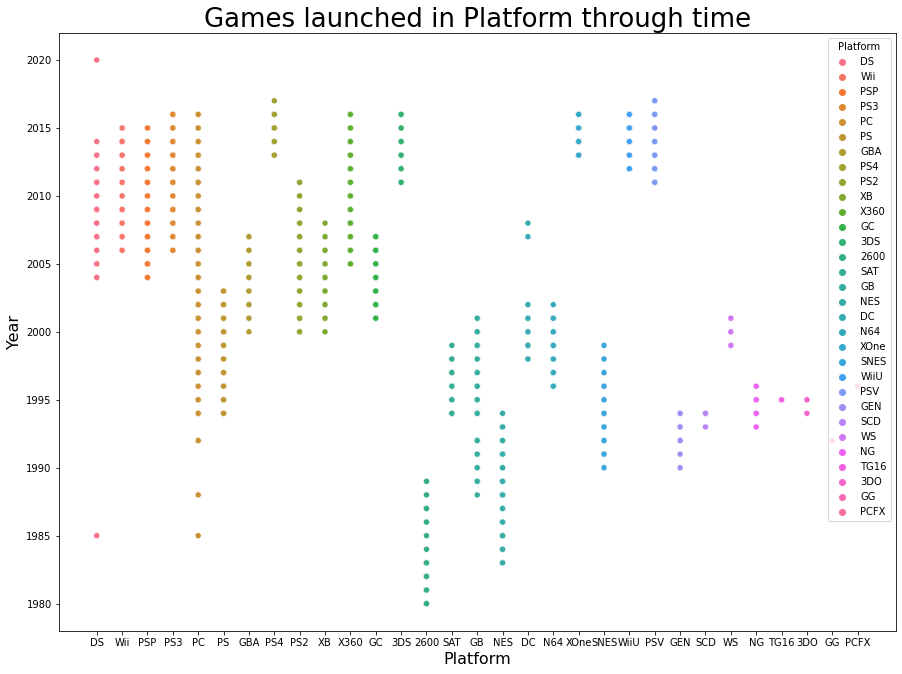

In [152]:
subset2
import seaborn as sns
fig = plt.figure(figsize=(15,11))
chart = sns.scatterplot(x='Platform', y = "Year", hue='Platform', data=subset2)
chart.set_title('Games launched in Platform through time', fontsize=26)
chart.set_xlabel("Platform", fontsize=16)
chart.set_ylabel("Year", fontsize=16)

2015년 이후 자료가 유의미할 것 같아서 최신자료로 잘랐습니다.

In [255]:
subset2time =subset2.sort_values(by="Year").tail(959) #2015년~자료

Text(0, 0.5, 'Year')

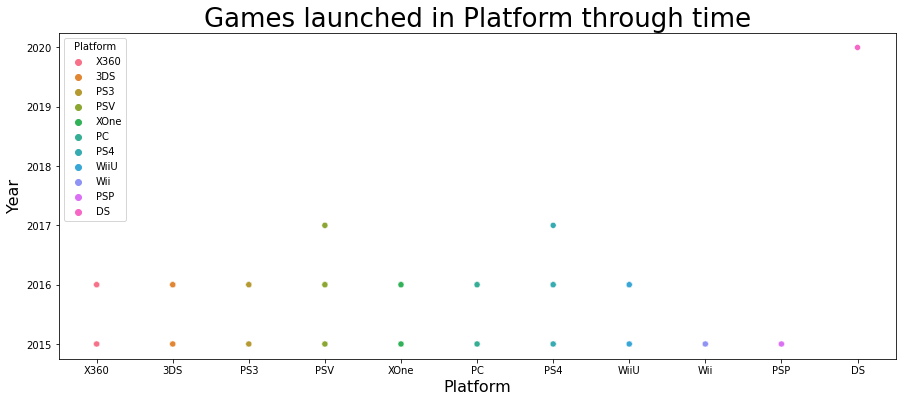

In [258]:
subset2
import seaborn as sns
fig = plt.figure(figsize=(15,6))
chart = sns.scatterplot(x='Platform', y = "Year", hue='Platform', data=subset2time)
chart.set_title('Games launched in Platform through time', fontsize=26)
chart.set_xlabel("Platform", fontsize=16)
chart.set_ylabel("Year", fontsize=16)

위의 그래프로 봤을 때 플랫폼은 유의미해보이지 않으니 어떤 플랫폼을 선택하든 상관없으나 콘솔게임은 플랫폼의 단종이 되면 새로운 게임이 나오지 않기 때문에 PC나 모바일로도 출시하는 것이 바람직해 보입니다.

## 정리하자면 다음 분기에 비디오 게임을 개발하게 된다면 북아메리카 지역을 타겟으로, 장르는 Action이나 스포츠, 플랫폼은 상관없지만 PC로도 같이 출시하면 좋을 것 같습니다.